### FBI NICS Firearm Background Check Data

Introduction:
The dataset used in this analysis comes from  FBI's National Instant Criminal Background Check System.The dataset used in this analysis comes from  FBI's National Instant Criminal Background Check System. NICS is mandated by the Brady Handgun Violence Prevention Act of 1993 and launched by the FBI on November 30, 1998. NICS is used by Federal Firearms Licensees (FFLs) to instantly determine whether a prospective buyer is eligible to buy firearms or explosives. Before ringing up the sale, cashiers call in a check to the FBI or to other designated agencies to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. The FBI provides data on the number of firearm checks by month, state, and type. These statistics represent the number of firearm background checks initiated through the NICS.Sales estimates are calculated from handgun and long gun background checks. Permit checks and other categories of background checks are excluded. The purpose of this analysis is to check the trend in background checks on hand gun and long run and as well check the top 5 states that have the highest background checks for fire arms.
 
The purpose of this analysis is to check the trend in background checks on hand gun and long run and as well check the top 5 states that have the highest background checks for fire arms.

### Questions to be answered for the analysis
1.What are the top 5 states that have the highest background checks?
2.What year has the lowest and highest background checks in handgun firearms?
3.What year has the lowest and highest background checks in longgun firearms?
4.Which of the year has the higher background checks between 1999 and 2017?

### Data cleaning and wrangling

In [120]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [121]:
#Loading the NICS dataset
df = pd.read_excel('C:\\Users\\sodiq\\Downloads\\gun_data.xlsx')

In [122]:
#Checking the columns in the dataset
df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [5]:
#Checking if the dataset has duplicates
sum(df.duplicated())

0

There are no duplicated rows in the dataset

In [123]:
#Checking the number or rows and columns in the dataset
df.shape

(12485, 27)

This shows that there are 12485 rows and 27 columns in the dataset

In [124]:
#checking the distribution of the data
df.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [7]:
#showing the types of the dataset
df.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

In [126]:
#some columns will be dropped due to the fact that they will be irrelevant in this analysis and some have high unknown value. 
#For this analysis, I will only be using the types of gun checked in the US which are handgun,long gun and other types of gun.
df.drop(['permit','permit_recheck','multiple','admin','prepawn_handgun','prepawn_long_gun','prepawn_other','redemption_handgun','redemption_long_gun'], axis = 1, inplace = True)


In [127]:
#checking the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   handgun                    12465 non-null  float64
 3   long_gun                   12466 non-null  float64
 4   other                      5500 non-null   float64
 5   redemption_other           5115 non-null   float64
 6   returned_handgun           2200 non-null   float64
 7   returned_long_gun          2145 non-null   float64
 8   returned_other             1815 non-null   float64
 9   rentals_handgun            990 non-null    float64
 10  rentals_long_gun           825 non-null    float64
 11  private_sale_handgun       2750 non-null   float64
 12  private_sale_long_gun      2750 non-null   float64
 13  private_sale_other         2750 non-null   flo

In [128]:
#some column were also dropped due to the fact that they have much null values 
df.drop(['redemption_other','returned_handgun','returned_long_gun','returned_other','rentals_handgun','rentals_long_gun','private_sale_handgun','private_sale_long_gun','private_sale_other','return_to_seller_handgun','return_to_seller_long_gun','return_to_seller_other','other','totals'], axis = 1, inplace = True)
 

In [129]:
#sum total of handgun and longgun were added to the columns
df['Totals'] = df['handgun'] + df['long_gun']

In [130]:
#Checking the new column
df.head()

,month,state,handgun,long_gun,Totals
0,2017-09,Alabama,5734.0,6320.0,12054.0
1,2017-09,Alaska,2320.0,2930.0,5250.0
2,2017-09,Arizona,11063.0,7946.0,19009.0
3,2017-09,Arkansas,4347.0,6063.0,10410.0
4,2017-09,California,37165.0,24581.0,61746.0


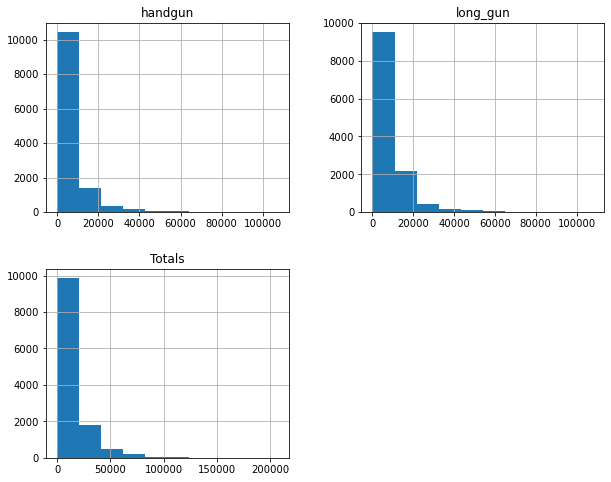

In [132]:
#This shows that handgun,longgun and totals are right skewed
df.hist(figsize = (10,8));

The above statistics shows that longgun,handgun and Totals are right skewed.

In [133]:
#checking the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   month     12485 non-null  object 
 1   state     12485 non-null  object 
 2   handgun   12465 non-null  float64
 3   long_gun  12466 non-null  float64
 4   Totals    12465 non-null  float64
dtypes: float64(3), object(2)
memory usage: 487.8+ KB


In [134]:
#filling up the null values using mean
df.fillna(df.mean(), inplace = True)

C:\Users\sodiq\AppData\Local\Temp/ipykernel_11692/3163997145.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace = True)


In [135]:
#This shows that there is no null value in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   month     12485 non-null  object 
 1   state     12485 non-null  object 
 2   handgun   12485 non-null  float64
 3   long_gun  12485 non-null  float64
 4   Totals    12485 non-null  float64
dtypes: float64(3), object(2)
memory usage: 487.8+ KB


In [136]:
#The month column data type is changed to datatime from string
df['month'] = pd.to_datetime(df['month'])

In [137]:
#Proof that the month data type is changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   month     12485 non-null  datetime64[ns]
 1   state     12485 non-null  object        
 2   handgun   12485 non-null  float64       
 3   long_gun  12485 non-null  float64       
 4   Totals    12485 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 487.8+ KB


In [19]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.month = pd.to_datetime(df.month)
df.head()

,month,state,handgun,long_gun,Totals
0,2017-09-01,Alabama,5734.0,6320.0,12054.0
1,2017-09-01,Alaska,2320.0,2930.0,5250.0
2,2017-09-01,Arizona,11063.0,7946.0,19009.0
3,2017-09-01,Arkansas,4347.0,6063.0,10410.0
4,2017-09-01,California,37165.0,24581.0,61746.0


### Exploratory Data Analysis

In [22]:
df[['month','long_gun']]

,month,long_gun
0,2017-09,6320.0
1,2017-09,2930.0
2,2017-09,7946.0
3,2017-09,6063.0
4,2017-09,24581.0
...,...,...
12480,1998-11,2.0
12481,1998-11,286.0
12482,1998-11,251.0
12483,1998-11,214.0


In [21]:
#creating a datatime variable from month variable
df['date'] = pd.to_datetime(df['month'])

#extracting data information from datatime variable
df['year'] = df['date'].dt.year

#examining the year data
df['year'].value_counts().sort_index()

1998    110
1999    660
2000    660
2001    660
2002    660
2003    660
2004    660
2005    660
2006    660
2007    660
2008    660
2009    660
2010    660
2011    660
2012    660
2013    660
2014    660
2015    660
2016    660
2017    495
Name: year, dtype: int64

### Which of the year has the higher background checks between 1999 and 2017?

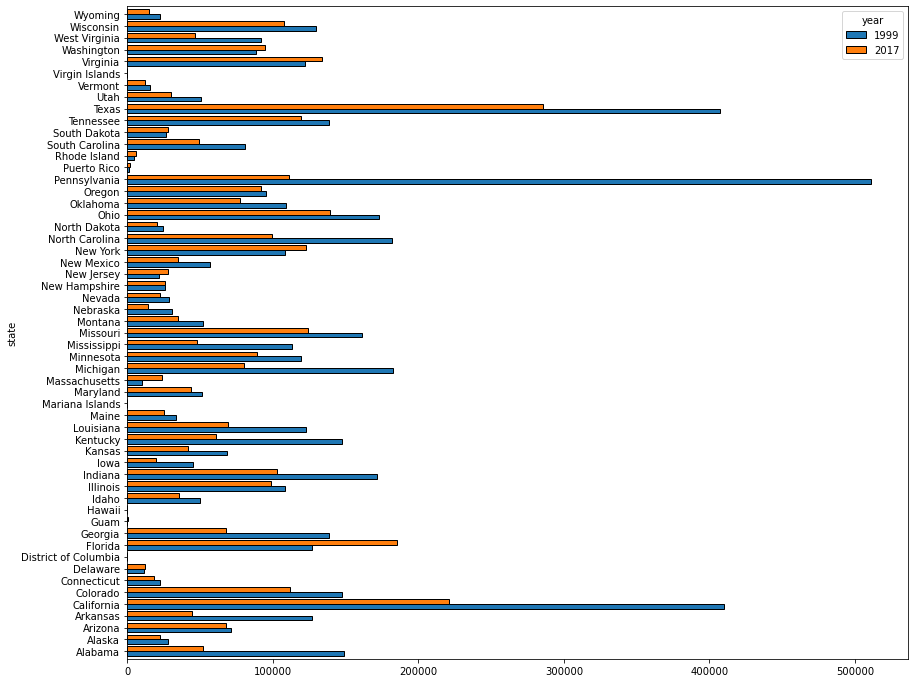

In [44]:
#getting aggregate data for 1999 and 2017
df.query('year in [1999,2017]').groupby(['state','year'])['long_gun'].sum().unstack('year').plot.barh(edgecolor='black',figsize=[14,12],rot=0,width=0.8);

It can be deduced from the visualization that in 1999 we have the higher background check of firearms compared to 2017. This can mean the laws then in 1999 is not as strict to own a firearm to 2017.

In [45]:
def myGrpPlot(df,grpvar,yvar,stat='sum'):
    '''
    docstring: IMPORTANT explain function here
    inputs: ...
    output:...
    '''
    #plot
    df.groupby([grpvar])[yvar].agg(stat).plot.bar(edgecolor='black',figsize=[14,6],rot=0,width=0.8);
    #tidying up labels
    grpvar= grpvar.replace('_','') #replacing _ with a space
    yvar=yvar.replace('_','') #replacing _ with a space
    #adding title and formating it
    plt.title(f'{stat} of {yvar} by {grpvar}'.title(),fontsize=14,weight='bold')
    #adding x label and formating it
    plt.xlabel(grpvar.title(),fontsize=10,weight='bold')
    #adding y label and formating it
    plt.ylabel(f'{stat} {yvar}'.title(),fontsize=10,weight='bold')

### What year has the lowest and highest background checks in longgun firearms?

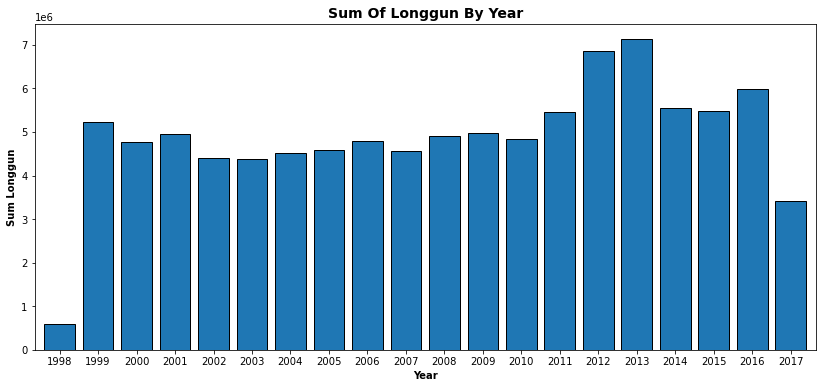

In [47]:
#checking which state has the highest background checks for firearms
myGrpPlot(df,'year','long_gun')

The highest background checks in Longgun occured in 2013 and the lowest happened in 1998

### What year has the lowest and highest background checks in handgun firearms?

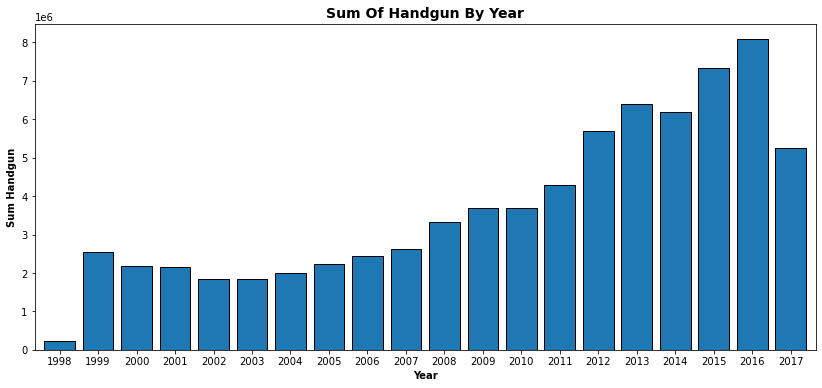

In [48]:
myGrpPlot(df,'year','handgun')

2016 has the highest background checks while 1998 has the lowest background checks.

### What are the top 5 states that have the highest background checks?

In [ ]:
### Research Question 3  (Top 5 states with highest background check)

In [138]:
# Top 5 states with highest background check
#grouping the data by sum total of firearms in each state
H5 = df.groupby(['state']).sum()

In [139]:
#The top 5 states that have highest background checks on firearms
H5_lar = H5.head().nlargest(5,'Totals')

In [140]:
H5_lar

,handgun,long_gun,Totals
state,,,
California,5910880.0,5936770.0,11847650.0
Alabama,2222037.0,2626029.0,4848066.0
Arizona,1781468.0,1480762.0,3262230.0
Arkansas,965584.0,1663256.0,2628840.0
Alaska,434602.0,572174.0,1006776.0


It can be deduced from the above table that the top 5 states that have the highest background checks are
1.California
2.Alabama
3.Arizona
4.Arkansas
5.Alaska


## Conclusions


From the analysis, its shown that the highest background checks for handgun was done in the year 2016 and highest background checks for longgun done was in 2013. The trend also shows that there will be decrease in background checks in the coming year due to new laws to hold a firearm. 
The top 5 states with highest background checks are:
1.California
2.Alabama
3.Arizona
4.Arkansas
5.Alaska
Furthermore the analysis shows that 1999 background checks are higher than the ones in 2017 when comparing the total checks between 1999 and 2017.

Limitations:
During the analysis some columns were dropped due to the fact that they are not up to date which I have to drop them. If they had been in the analysis, more insights would have been deduced.